## MMLU dataset

In [1]:
import pandas as pd

def analyze_mmlu_dataset(path):
    df = pd.read_csv(path)
    predicted_answers = df['Predicted Answer']
    correct_answers = df['Correct Answer']
    correct = 0
    for i in range(len(predicted_answers)):
        if predicted_answers[i] == correct_answers[i]:
            correct += 1
    accuracy = correct / len(predicted_answers)
    return accuracy

### Without any fine-tuning

In [3]:
gpt_ml = analyze_mmlu_dataset('exp0/machine_learning_gpt4o_results.csv')
gpt_psychology = analyze_mmlu_dataset('exp0/professional_psychology_gpt4o_results.csv')
llama_ml = analyze_mmlu_dataset('exp0/machine_learning_llama_vanilla_results.csv')
llama_psychology = analyze_mmlu_dataset('exp0/professional_psychology_llama_vanilla_results.csv')

### With fine-tuning

In [4]:
ml_llama_ml = analyze_mmlu_dataset('exp1/machine_learning_llama_finetuned-(machine_learning)_results.csv')
ml_llama_psychology = analyze_mmlu_dataset('exp1/professional_psychology_llama_finetuned-(machine_learning)_results.csv')
psychology_llama_ml = analyze_mmlu_dataset('exp1/machine_learning_llama_finetuned-(professional_psychology)_results.csv')
psychology_llama_psychology = analyze_mmlu_dataset('exp1/professional_psychology_llama_finetuned-(professional_psychology)_results.csv')

In [6]:
gpt_ml, gpt_psychology, llama_ml, llama_psychology, ml_llama_ml, ml_llama_psychology, psychology_llama_ml, psychology_llama_psychology

(0.78, 0.88, 0.3, 0.42, 0.36, 0.37, 0.29, 0.3)

In [7]:
llama_ml_gen = 0.31
llama_psychology_gen = 0.39

<Figure size 1000x600 with 0 Axes>

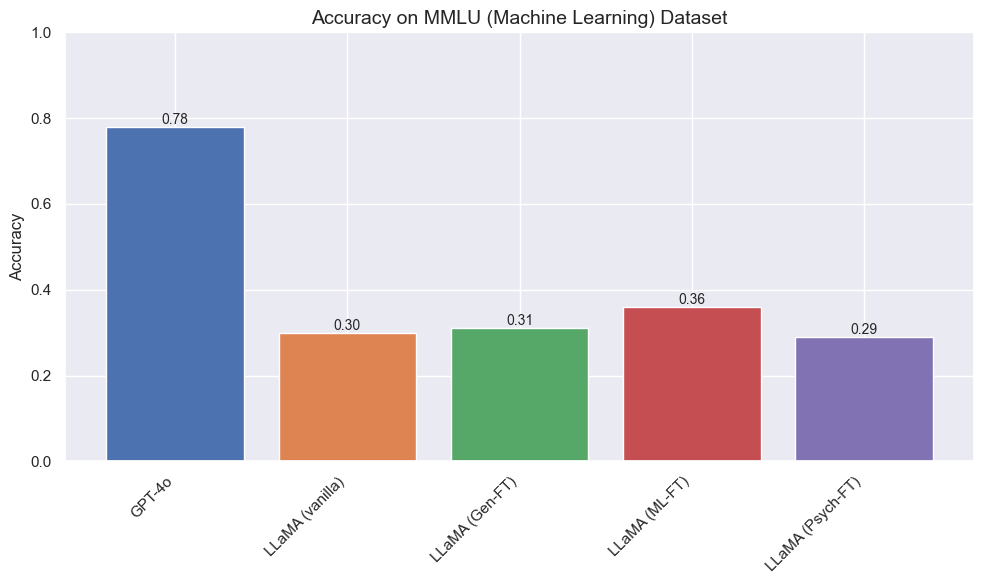

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style and figure size for better readability
sns.set_theme()
plt.figure(figsize=(10, 6))

# Prepare the data
labels = ['GPT-4o', 'LLaMA (vanilla)', 'LLaMA (Gen-FT)', 'LLaMA (ML-FT)', 'LLaMA (Psych-FT)']
accuracy = [gpt_ml, llama_ml, llama_ml_gen, ml_llama_ml, psychology_llama_ml]

# Create the plot with improved formatting
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, accuracy, color=sns.color_palette('deep'))

# Customize the plot
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy on MMLU (Machine Learning) Dataset', fontsize=14)

# Set y-axis limits from 0 to 1
ax.set_ylim(0, 1)

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', 
            ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# save the plot
plt.savefig('graphs/mmlu_machine_learning.png', dpi=900)

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

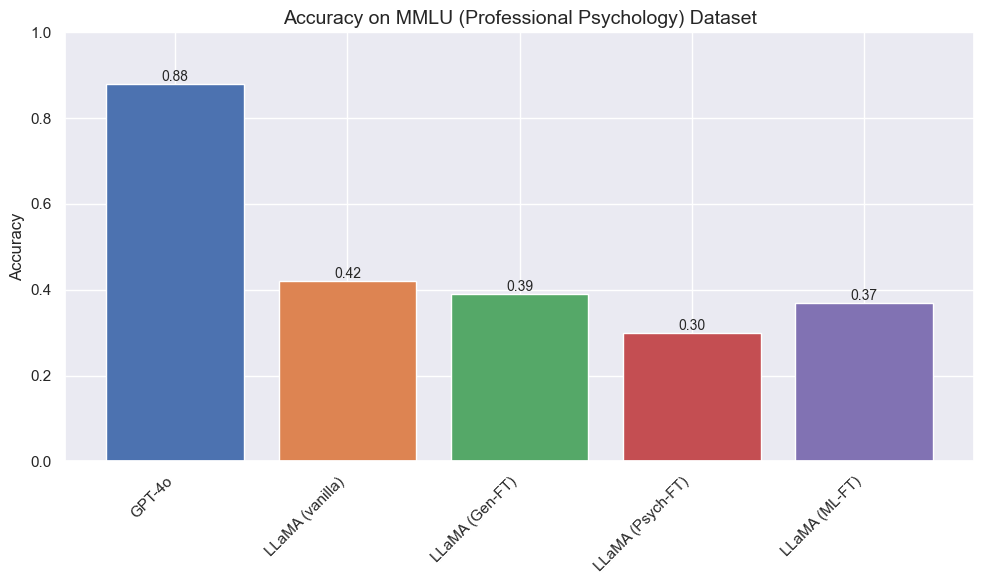

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style and figure size for better readability
sns.set_theme()
plt.figure(figsize=(10, 6))

# Prepare the data
labels = ['GPT-4o', 'LLaMA (vanilla)', 'LLaMA (Gen-FT)', 'LLaMA (Psych-FT)', 'LLaMA (ML-FT)']
accuracy = [gpt_psychology, llama_psychology, llama_psychology_gen, psychology_llama_psychology, ml_llama_psychology]

# Create the plot with improved formatting
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, accuracy, color=sns.color_palette('deep'))

# Set y-axis limits from 0 to 1
ax.set_ylim(0, 1)

# Customize the plot
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy on MMLU (Professional Psychology) Dataset', fontsize=14)

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', 
            ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# save the plot
plt.savefig('graphs/mmlu_professional_psychology.png', dpi=900)

# Show the plot
plt.show()

# Math dataset

In [2]:
vanilla_results_df = pd.read_csv('exp4/k_digit_addition_results_vanilla.csv')
finetuned_results_df = pd.read_csv('exp4/k_digit_addition_results_finetune.csv')

<Figure size 1200x700 with 0 Axes>

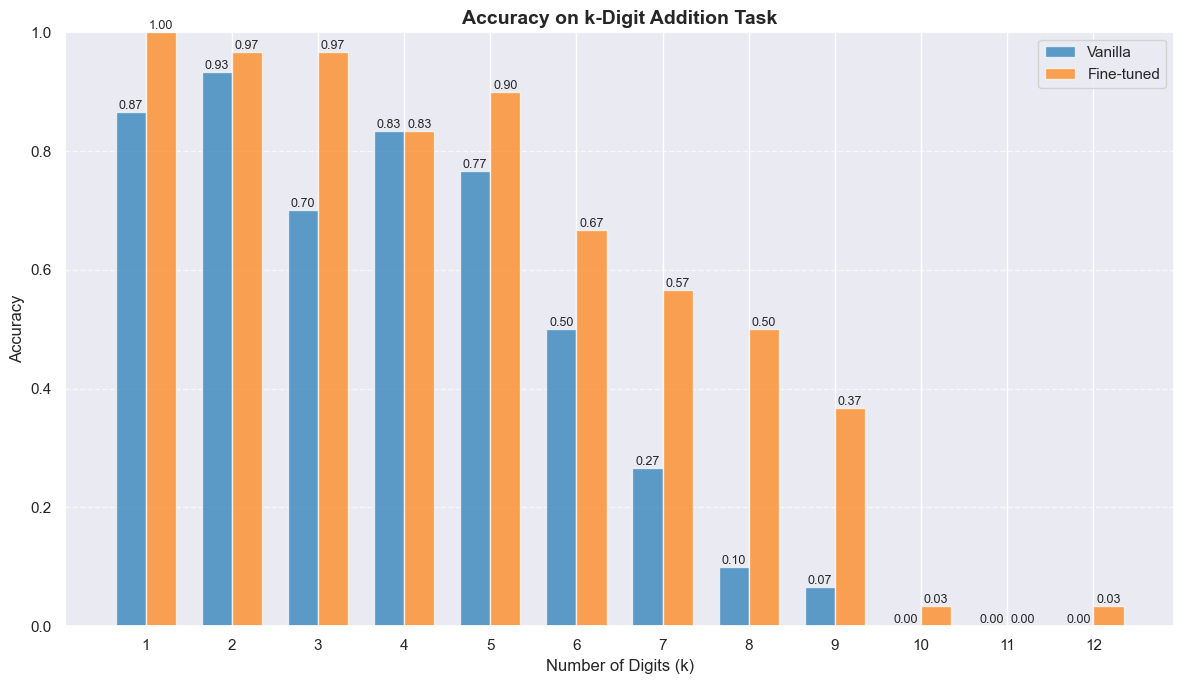

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style and figure size for better readability
plt.figure(figsize=(12, 7))
sns.set_theme()

# Prepare the data
k = vanilla_results_df['k']
accuracy_vanilla = vanilla_results_df['accuracy']
accuracy_finetuned = finetuned_results_df['accuracy']

# Create the plot with improved formatting
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.35
index = np.arange(len(k))

# Create grouped bar plot
bars_vanilla = ax.bar(index, accuracy_vanilla, bar_width, 
                      label='Vanilla', 
                      color='#1f77b4', 
                      alpha=0.7)
bars_finetuned = ax.bar(index + bar_width, accuracy_finetuned, bar_width, 
                        label='Fine-tuned', 
                        color='#ff7f0e', 
                        alpha=0.7)

# Customize the plot
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_xlabel('Number of Digits (k)', fontsize=12)
ax.set_title('Accuracy on k-Digit Addition Task', fontsize=14, fontweight='bold')

# Set x-ticks in the middle of the grouped bars
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(k)

# Set y-axis to go from 0 to 1
ax.set_ylim(0, 1)

# Add a light grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

add_value_labels(bars_vanilla)
add_value_labels(bars_finetuned)

# Add legend
ax.legend(loc='best')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# save the plot
plt.savefig('graphs/k_digit_addition_accuracy_bar.png', dpi=900)

# Show the plot
plt.show()

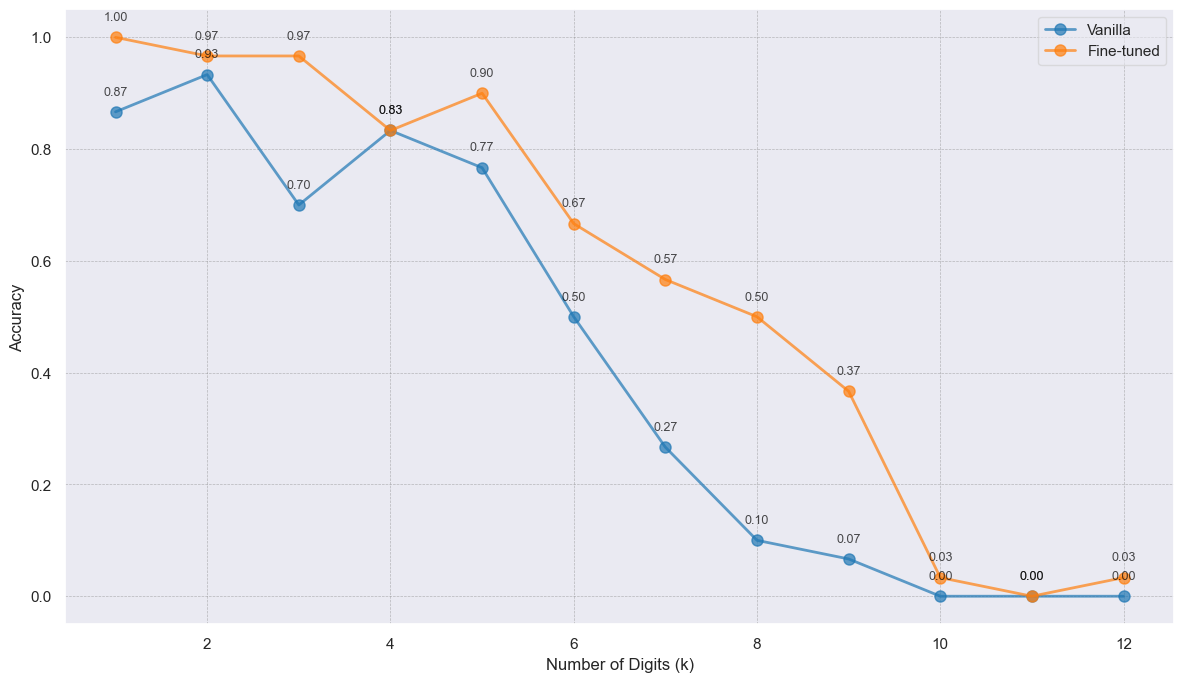

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the plot with improved formatting
plt.figure(figsize=(12, 7))
sns.set_theme()

# Plot the accuracy for vanilla and fine-tuned models
plt.plot(k, accuracy_vanilla, marker='o', linestyle='-', linewidth=2, 
         color='#1f77b4', label='Vanilla', markersize=8, alpha=0.7)
plt.plot(k, accuracy_finetuned, marker='o', linestyle='-', linewidth=2, 
         color='#ff7f0e', label='Fine-tuned', markersize=8, alpha=0.7)

# Customize the plot
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Number of Digits (k)', fontsize=12)
# plt.title('Accuracy on k-Digit Addition Task', fontsize=14, fontweight='bold')

# Set y-axis to go from 0 to 1 with some padding
plt.ylim(-0.05, 1.05)

# Add a more detailed grid
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# Add legend
plt.legend(loc='best', frameon=True, framealpha=0.6)

# Annotate key points
def annotate_points(x, y, offset=0.02):
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(f'{yi:.2f}', 
                     (xi, yi), 
                     xytext=(0, 10),
                     textcoords='offset points',
                     ha='center',
                     va='bottom',
                     fontsize=9,
                     color='black',
                     alpha=0.7)

annotate_points(k, accuracy_vanilla)
annotate_points(k, accuracy_finetuned)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# save the plot (as pdf)
# plt.savefig('graphs/k_digit_addition_accuracy_line.png', dpi=900)
plt.savefig('graphs/k_digit_addition_accuracy_line.pdf')

# Show the plot
plt.show()

In [7]:
import pandas as pd
import Levenshtein

def evaluate_algebra_predictions(df):
    """
    Evaluate algebra model predictions with a more granular scoring mechanism.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing columns: 
        - k: number of digits
        - correct_output: ground truth output
        - predicted_output: model's predicted output
    
    Returns:
    --------
    dict: Comprehensive evaluation metrics
        - overall_accuracy: Strict binary accuracy
        - digit_accuracy: Percentage of digits correctly predicted
        - normalized_edit_distance: Levenshtein distance-based score
        - per_digit_breakdown: Detailed accuracy by digit count
    """
    def digit_accuracy(true_str, pred_str):
        """Calculate the percentage of digits correctly matched."""
        correct_digits = sum(t == p for t, p in zip(str(true_str), str(pred_str)))
        total_digits = max(len(str(true_str)), len(str(pred_str)))
        return correct_digits / total_digits
    
    def normalized_edit_distance(true_str, pred_str):
        """
        Calculate normalized Levenshtein distance.
        Lower values indicate closer match.
        """
        true_str = str(true_str)
        pred_str = str(pred_str)
        distance = Levenshtein.distance(true_str, pred_str)
        max_length = max(len(true_str), len(pred_str))
        return 1 - (distance / max_length)
    
    # Overall metrics
    total_samples = len(df)
    strict_accuracy = df['is_correct'].mean()
    
    # Digit-level accuracy
    df['digit_accuracy'] = df.apply(
        lambda row: digit_accuracy(row['correct_output'], row['predicted_output']), 
        axis=1
    )
    
    # Normalized edit distance
    df['edit_distance_score'] = df.apply(
        lambda row: normalized_edit_distance(row['correct_output'], row['predicted_output']), 
        axis=1
    )
    
    # Breakdown by number of digits
    per_digit_breakdown = df.groupby('k').agg({
        'is_correct': 'mean',
        'digit_accuracy': 'mean',
        'edit_distance_score': 'mean'
    }).reset_index()
    
    # Overall detailed metrics
    evaluation_metrics = {
        'overall_accuracy': strict_accuracy,
        'average_digit_accuracy': df['digit_accuracy'].mean(),
        'average_edit_distance_score': df['edit_distance_score'].mean(),
        'per_digit_breakdown': per_digit_breakdown
    }
    
    return evaluation_metrics


vanilla_predictions_df = pd.read_csv('exp4/k_digit_addition_predictions_vanilla.csv')
finetuned_predictions_df = pd.read_csv('exp4/k_digit_addition_predictions_finetune.csv')


In [8]:
vanilla_evaluation = evaluate_algebra_predictions(vanilla_predictions_df)

In [9]:
vanilla_evaluation = vanilla_evaluation['per_digit_breakdown']

In [10]:
finetune_evaluation = evaluate_algebra_predictions(finetuned_predictions_df)

In [11]:
finetune_evaluation = finetune_evaluation['per_digit_breakdown']

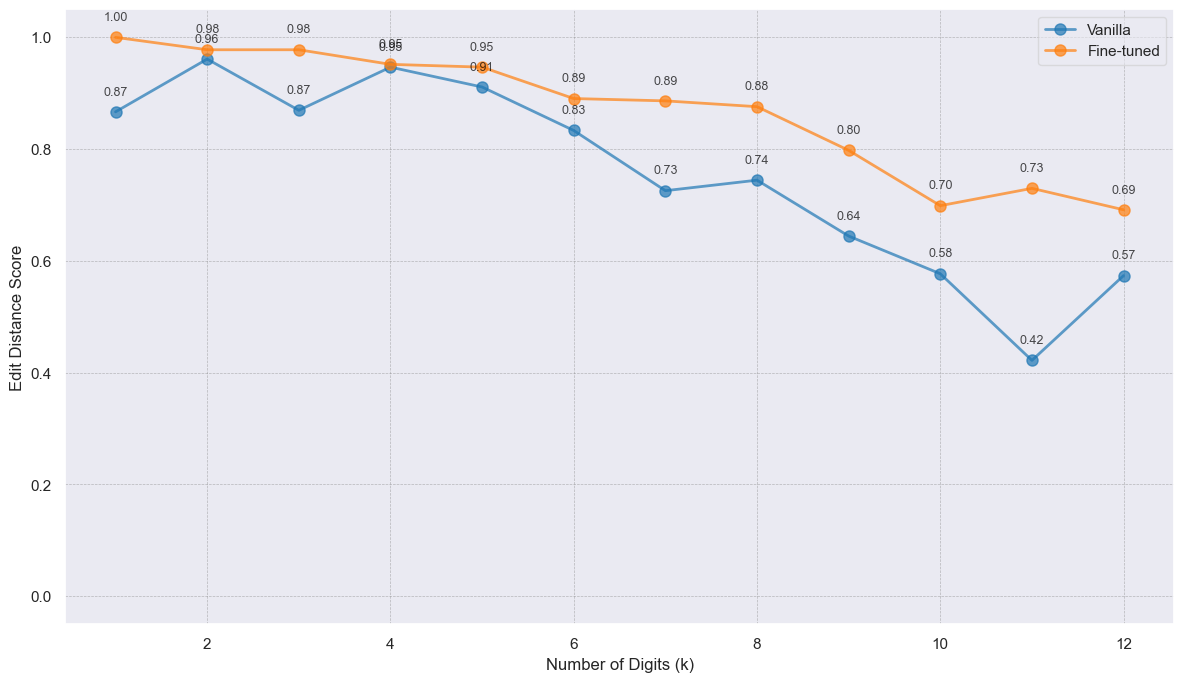

In [14]:
import matplotlib.pyplot as plt

# Create the plot with improved formatting
plt.figure(figsize=(12, 7))
sns.set_theme()

# Plot the edit distance scores for vanilla and fine-tuned models
plt.plot(vanilla_evaluation['k'], vanilla_evaluation['edit_distance_score'], 
         marker='o', linestyle='-', linewidth=2, 
         color='#1f77b4', label='Vanilla', markersize=8, alpha=0.7)
plt.plot(finetune_evaluation['k'], finetune_evaluation['edit_distance_score'], 
         marker='o', linestyle='-', linewidth=2, 
         color='#ff7f0e', label='Fine-tuned', markersize=8, alpha=0.7)

# Customize the plot
plt.ylabel('Edit Distance Score', fontsize=12)
plt.xlabel('Number of Digits (k)', fontsize=12)
# plt.title('Edit Distance Score on k-Digit Addition Task', fontsize=14, fontweight='bold')

# Set y-axis to go from 0 to 1 with some padding
plt.ylim(-0.05, 1.05)

# Add a more detailed grid
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# Add legend
plt.legend(loc='best', frameon=True, framealpha=0.6)

# Annotate key points
def annotate_points(x, y, offset=0.02):
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(f'{yi:.2f}', 
                     (xi, yi), 
                     xytext=(0, 10),
                     textcoords='offset points',
                     ha='center',
                     va='bottom',
                     fontsize=9,
                     color='black',
                     alpha=0.7)

annotate_points(vanilla_evaluation['k'], vanilla_evaluation['edit_distance_score'])
annotate_points(finetune_evaluation['k'], finetune_evaluation['edit_distance_score'])

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# save the plot
# plt.savefig('graphs/k_digit_addition_edit_distance_line.png', dpi=900)
plt.savefig('graphs/k_digit_addition_edit_distance_line.pdf')

# Show the plot
plt.show()

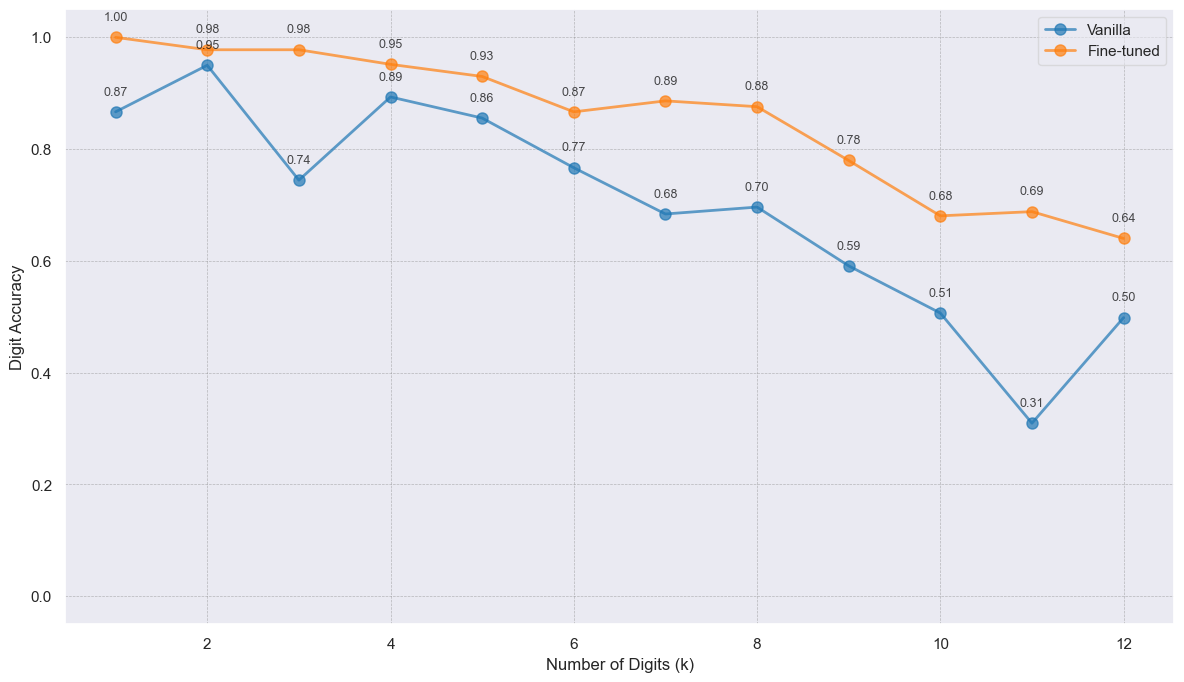

In [15]:
import matplotlib.pyplot as plt

# Create the plot with improved formatting
plt.figure(figsize=(12, 7))
sns.set_theme()

# Plot the digit accuracy for vanilla and fine-tuned models
plt.plot(vanilla_evaluation['k'], vanilla_evaluation['digit_accuracy'], 
         marker='o', linestyle='-', linewidth=2, 
         color='#1f77b4', label='Vanilla', markersize=8, alpha=0.7)
plt.plot(finetune_evaluation['k'], finetune_evaluation['digit_accuracy'], 
         marker='o', linestyle='-', linewidth=2, 
         color='#ff7f0e', label='Fine-tuned', markersize=8, alpha=0.7)

# Customize the plot
plt.ylabel('Digit Accuracy', fontsize=12)
plt.xlabel('Number of Digits (k)', fontsize=12)
# plt.title('Digit Accuracy on k-Digit Addition Task', fontsize=14, fontweight='bold')

# Set y-axis to go from 0 to 1 with some padding
plt.ylim(-0.05, 1.05)

# Add a more detailed grid
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# Add legend
plt.legend(loc='best', frameon=True, framealpha=0.6)

# Annotate key points
def annotate_points(x, y, offset=0.02):
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(f'{yi:.2f}', 
                     (xi, yi), 
                     xytext=(0, 10),
                     textcoords='offset points',
                     ha='center',
                     va='bottom',
                     fontsize=9,
                     color='black',
                     alpha=0.7)

annotate_points(vanilla_evaluation['k'], vanilla_evaluation['digit_accuracy'])
annotate_points(finetune_evaluation['k'], finetune_evaluation['digit_accuracy'])

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# save the plot
# plt.savefig('graphs/k_digit_addition_digit_accuracy_line.png', dpi=900)
plt.savefig('graphs/k_digit_addition_digit_accuracy_line.pdf')

# Show the plot
plt.show()